In [4]:
import os
import io
import pandas as pd
import scanpy as sc
import pyarrow.dataset as ds
import gcsfs
import timeit
from datetime import timedelta


In [14]:
cell_line = 'CVCL_1285'
plate = 'plate1'
drug_name = 'Apalutamide'
#drug_name = 'Vemurafenib'

In [ ]:
!gsutil -m cp gs://tahoe100m_bycelllines/all_cells.zip .

In [2]:
!gsutil -m cp gs://tahoe100m_bycelllines/plate1_CVCL_1285.h5ad .

Copying gs://tahoe100m_bycelllines/plate1_CVCL_1285.h5ad...
- [1/1 files][502.6 MiB/502.6 MiB] 100% Done                                    
Operation completed over 1 objects/502.6 MiB.                                    


In [3]:
t_0 = timeit.default_timer()
sample_metadata = pd.read_csv('all_cells.zip',index_col=0)
t_1 = timeit.default_timer()
elapsed_time = round((t_1 - t_0), 3)
print(f"Elapsed time: {elapsed_time} s")
display(sample_metadata)

NameError: name 'timeit' is not defined

In [11]:
t_0 = timeit.default_timer()
fs = gcsfs.GCSFileSystem()
gcp_base_path = "gs://tahoe100m_bycelllines"
infile = os.path.join(gcp_base_path, 'all_cells.zip')
sample_metadata = pd.read_csv(infile)
t_1 = timeit.default_timer()
elapsed_time = round((t_1 - t_0), 3)
print(f"Elapsed time for downloading: {elapsed_time} s")
display(sample_metadata)

Elapsed time for downloading: 115.508 s


,Unnamed: 0,plate,mread_count,drugname_drugconc,cell_line,pcnt_mito,cell_name
0,0,plate10,2559,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",CVCL_1478,0.029926,NCI-H1573
1,1,plate10,1470,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",CVCL_0459,0.026274,NCI-H460
2,2,plate10,1446,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",CVCL_C466,0.033898,hTERT-HPNE
3,3,plate10,559,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",CVCL_1724,0.037190,SW48
4,4,plate10,6269,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",CVCL_1285,0.017465,HOP62
...,...,...,...,...,...,...,...
100648785,100648785,plate9,2852,"[('DMSO_TF', 0.0, 'uM')]",CVCL_0293,0.075960,HEC-1-A
100648786,100648786,plate9,942,"[('DMSO_TF', 0.0, 'uM')]",CVCL_0504,0.041250,RKO
100648787,100648787,plate9,5729,"[('DMSO_TF', 0.0, 'uM')]",CVCL_0320,0.064704,HT-29
100648788,100648788,plate9,2471,"[('DMSO_TF', 0.0, 'uM')]",CVCL_1119,0.044881,CFPAC-1


In [9]:
t_0 = timeit.default_timer()
fs = gcsfs.GCSFileSystem()
gcp_base_path = "gs://arc-ctc-tahoe100/2025-02-25/"
infile = os.path.join(gcp_base_path, 'metadata', 'sample_metadata.parquet')
infile = os.path.join(gcp_base_path, 'metadata', 'obs_metadata.parquet')
sample_metadata = ds.dataset(infile, filesystem=fs, format="parquet").to_table().to_pandas()
t_1 = timeit.default_timer()
elapsed_time = round((t_1 - t_0), 3)
print(f"Elapsed time: {elapsed_time} s")
display(sample_metadata)

Elapsed time: 102.466 s


,plate,BARCODE_SUB_LIB_ID,sample,gene_count,tscp_count,mread_count,drugname_drugconc,drug,cell_line,sublibrary,BARCODE,pcnt_mito,S_score,G2M_score,phase,pass_filter,cell_name
0,plate10,01_001_001-lib_1681,smp_2359,1379,2172,2559,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",Bestatin (hydrochloride),CVCL_1478,lib_1681,01_001_001,0.029926,-0.229665,-0.190110,G1,full,NCI-H1573
1,plate10,01_002_149-lib_1681,smp_2359,975,1256,1470,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",Bestatin (hydrochloride),CVCL_0459,lib_1681,01_002_149,0.026274,-0.167578,-0.132784,G1,full,NCI-H460
2,plate10,01_003_052-lib_1681,smp_2359,865,1239,1446,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",Bestatin (hydrochloride),CVCL_C466,lib_1681,01_003_052,0.033898,-0.200957,-0.161538,G1,full,hTERT-HPNE
3,plate10,01_003_090-lib_1681,smp_2359,393,484,559,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",Bestatin (hydrochloride),CVCL_1724,lib_1681,01_003_090,0.037190,-0.052746,-0.076190,G1,minimal,SW48
4,plate10,01_003_093-lib_1681,smp_2359,2657,5325,6269,"[('Bestatin (hydrochloride)', 0.05, 'uM')]",Bestatin (hydrochloride),CVCL_1285,lib_1681,01_003_093,0.017465,-0.636364,-0.614103,G1,full,HOP62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100648785,plate9,96_191_161-lib_2608,smp_2358,1763,2475,2852,"[('DMSO_TF', 0.0, 'uM')]",DMSO_TF,CVCL_0293,lib_2608,96_191_161,0.075960,-0.129528,0.146154,G2M,full,HEC-1-A
100648786,plate9,96_191_173-lib_2608,smp_2358,656,800,942,"[('DMSO_TF', 0.0, 'uM')]",DMSO_TF,CVCL_0504,lib_2608,96_191_173,0.041250,-0.047961,0.024725,G2M,full,RKO
100648787,plate9,96_192_081-lib_2608,smp_2358,2872,4992,5729,"[('DMSO_TF', 0.0, 'uM')]",DMSO_TF,CVCL_0320,lib_2608,96_192_081,0.064704,-0.039417,0.411355,G2M,full,HT-29
100648788,plate9,96_192_166-lib_2608,smp_2358,1438,2139,2471,"[('DMSO_TF', 0.0, 'uM')]",DMSO_TF,CVCL_1119,lib_2608,96_192_166,0.044881,-0.148553,-0.022161,G1,full,CFPAC-1


In [4]:
sample_metadata1 = sample_metadata[['plate','mread_count','drugname_drugconc','cell_line','pcnt_mito','cell_name']]

In [7]:
sample_metadata1.to_csv('all_cells.zip', compression={'method': 'zip', 'compresslevel': 9})

In [28]:
adata = sc.read_h5ad(plate+'_'+cell_line+'.h5ad')
adata

AnnData object with n_obs × n_vars = 160354 × 62710
    obs: 'sample', 'gene_count', 'tscp_count', 'mread_count', 'drugname_drugconc', 'drug', 'cell_line', 'sublibrary', 'BARCODE', 'pcnt_mito', 'S_score', 'G2M_score', 'phase', 'pass_filter', 'cell_name', 'plate'

In [29]:
drugs = list(set(adata.obs['drug']))
print(drugs)
number_of_drugs = len(drugs)
print(f'{number_of_drugs=}')

['Erdafitinib ', 'Lapatinib ditosylate', 'BI-3406', 'Belzutifan', 'Capmatinib', '4EGI-1', 'DTP3', 'Paclitaxel', 'LB-100', 'Oleic acid', 'Oxaliplatin', 'Brivudine', 'Sonidegib', 'Bortezomib', 'PF-06260933', 'Lonafarnib', 'Encorafenib', 'olaparib', 'BI-78D3', 'Tucatinib', 'c-Kit-IN-1', 'Anastrozole', 'Celecoxib', 'APTO-253', 'MK-3903', 'Ixazomib', 'DMSO_TF', 'MK-8353', 'Bimiralisib', 'AZD-7648', 'LJI308', 'CP21R7', 'SBI-0640756', 'palbociclib', 'AZD1390', 'Tubulin inhibitor 6', 'Infigratinib', 'Gemcitabine', 'PH-797804', 'Methylprednisolone succinate', 'vincristine', 'Volasertib', 'Binimetinib', 'AZD2858', 'Minodronic acid', 'Abemaciclib', 'OTS514', 'RMC-6236', 'ERK5-IN-2', 'TAK-733', 'Torkinib', 'EX229', 'AZD-8055', 'DT-061', '9-ING-41', 'Dabrafenib', 'Vemurafenib', 'Tomivosertib', 'Afatinib', 'Temuterkib', 'Futibatinib', 'Trametinib', 'IQ 1', 'Everolimus', 'Pralsetinib', 'BAY1125976', 'Ipatasertib', 'Sapanisertib', 'AT7519', 'ETC-206', 'Hydroxyfasudil', 'ULK-101', 'TAK-901', 'LY2090314

In [57]:
drug_name = 'Lonafarnib'
adatac = adata[adata.obs['drug']=='DMSO_TF',:]
adata_drug = adata[adata.obs['drug']==drug_name,:]
print(adatac)
print(adata_drug)
adatat = sc.concat([adatac,adata_drug])
print(adatat)

View of AnnData object with n_obs × n_vars = 4763 × 62710
    obs: 'sample', 'gene_count', 'tscp_count', 'mread_count', 'drugname_drugconc', 'drug', 'cell_line', 'sublibrary', 'BARCODE', 'pcnt_mito', 'S_score', 'G2M_score', 'phase', 'pass_filter', 'cell_name', 'plate'
View of AnnData object with n_obs × n_vars = 2992 × 62710
    obs: 'sample', 'gene_count', 'tscp_count', 'mread_count', 'drugname_drugconc', 'drug', 'cell_line', 'sublibrary', 'BARCODE', 'pcnt_mito', 'S_score', 'G2M_score', 'phase', 'pass_filter', 'cell_name', 'plate'
AnnData object with n_obs × n_vars = 7755 × 62710
    obs: 'sample', 'gene_count', 'tscp_count', 'mread_count', 'drugname_drugconc', 'drug', 'cell_line', 'sublibrary', 'BARCODE', 'pcnt_mito', 'S_score', 'G2M_score', 'phase', 'pass_filter', 'cell_name', 'plate'


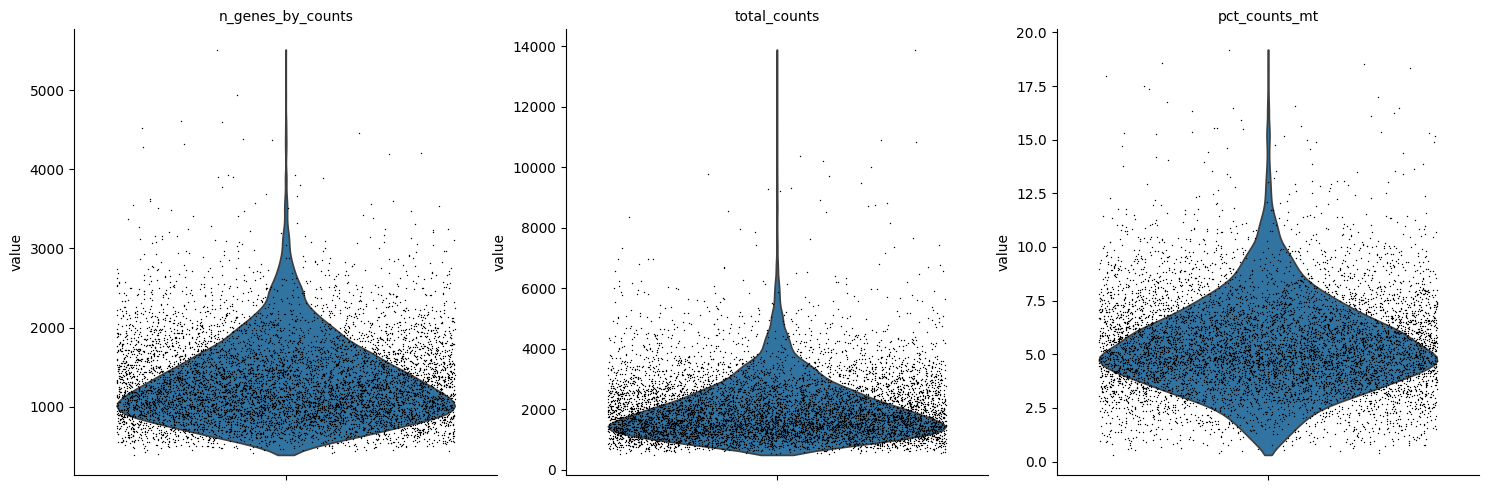

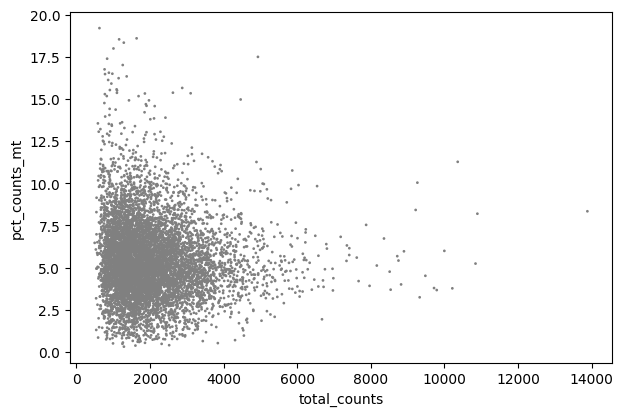

In [58]:
adatat.var["mt"] = adatat.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adatat, qc_vars=["mt"], inplace=True, log1p=True
)
sc.pl.violin(
    adatat,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.scatter(adatat,x='total_counts',y='pct_counts_mt')

In [59]:
sc.pp.filter_cells(adatat, min_genes=500)
sc.pp.filter_genes(adatat, min_cells=100)
# Normalizing to median total counts
sc.pp.normalize_total(adatat)
# Logarithmize the data
sc.pp.log1p(adatat)
sc.pp.highly_variable_genes(adatat, n_top_genes=10000, batch_key="sample")
adatat = adatat[:,adatat.var['highly_variable']]
adatat

View of AnnData object with n_obs × n_vars = 7713 × 10000
    obs: 'sample', 'gene_count', 'tscp_count', 'mread_count', 'drugname_drugconc', 'drug', 'cell_line', 'sublibrary', 'BARCODE', 'pcnt_mito', 'S_score', 'G2M_score', 'phase', 'pass_filter', 'cell_name', 'plate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'

/home/zinovyev/tahoe/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


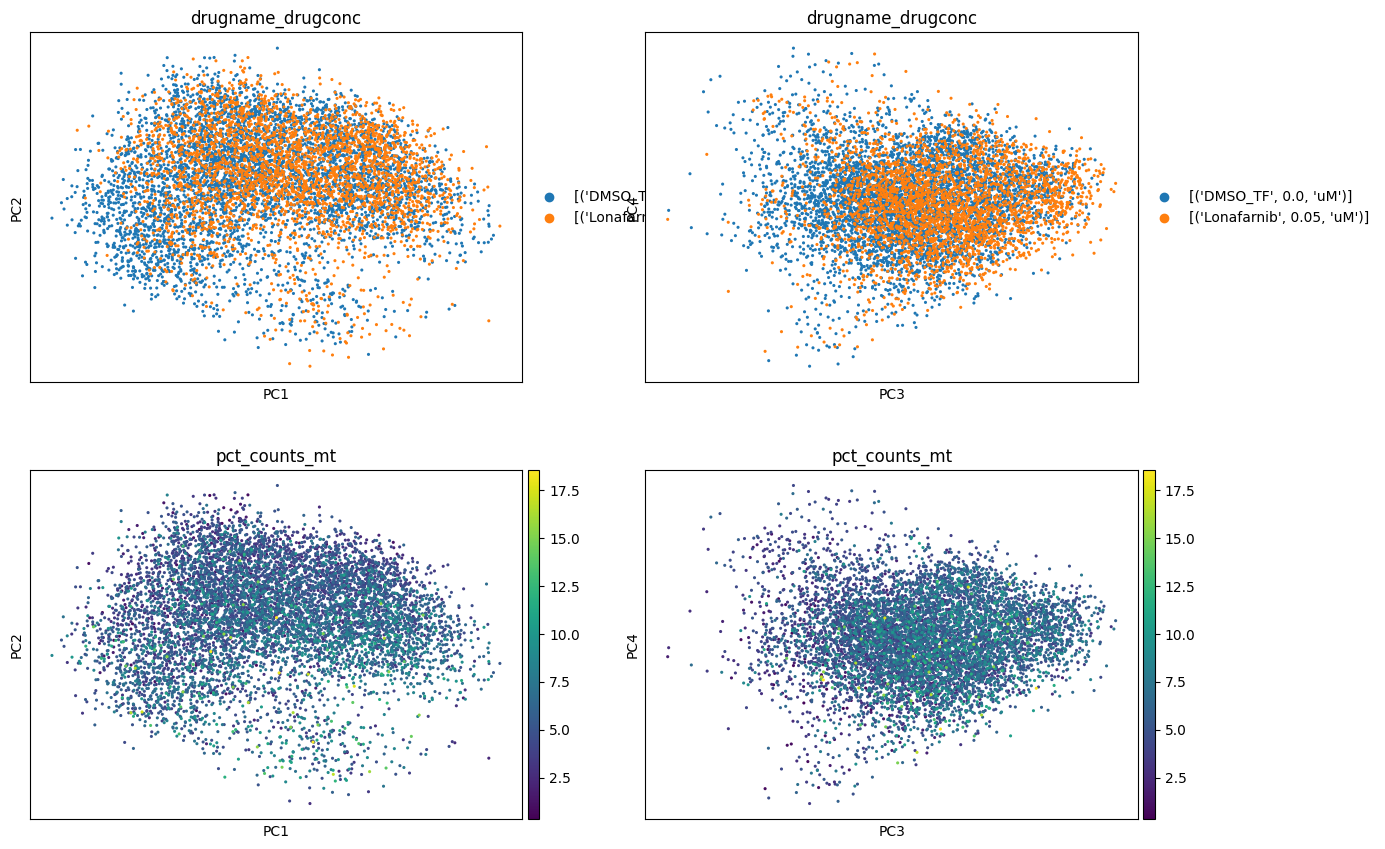

In [60]:
sc.tl.pca(adatat)
sc.pl.pca(
    adatat,
    color=["drugname_drugconc", "drugname_drugconc", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=20,
)
sc.pl.scatter(
    adatat,
    color="drugname_drugconc"
    x = 
    size=20,
)

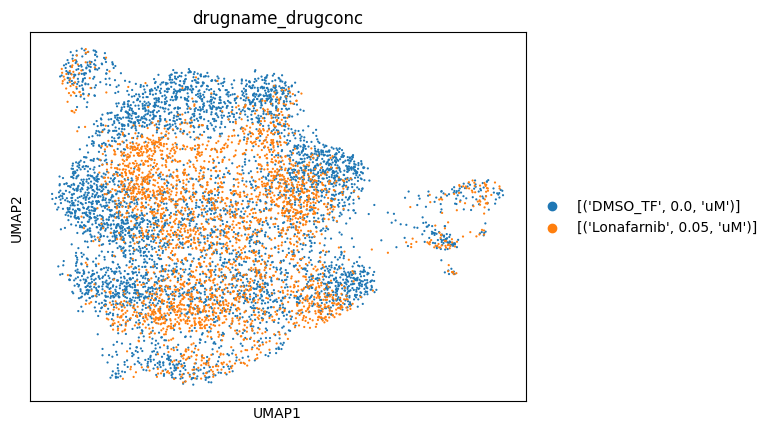

In [61]:
sc.pp.neighbors(adatat)
sc.tl.umap(adatat)
sc.pl.umap(
    adatat,
    color="drugname_drugconc",
    size=10,
)

In [70]:
cell_cycle_genes = [x.strip() for x in open('regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adatat.var_names]

sc.tl.score_genes_cell_cycle(adatat, s_genes=s_genes, g2m_genes=g2m_genes)

       'MLF1IP', 'RAD51AP1', 'GMNN', 'UBR7', 'RAD51', 'CDC45', 'EXO1', 'DSCC1',
       'CHAF1B', 'E2F8'],
      dtype='object')
       'RANGAP1', 'CDCA8', 'PSRC1', 'LBR', 'CENPA'],
      dtype='object')


/home/zinovyev/tahoe/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


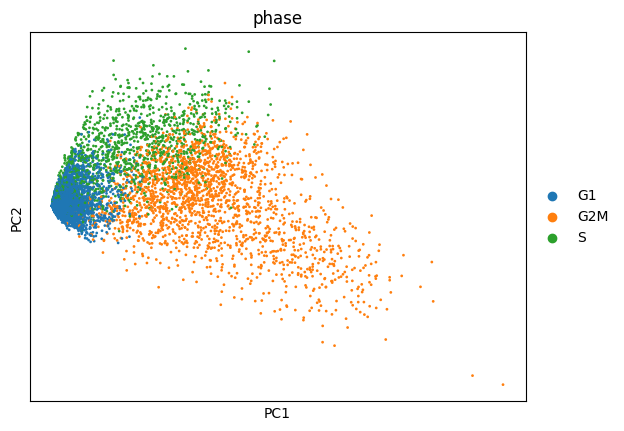

In [71]:
adata_cc_genes = adatat[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

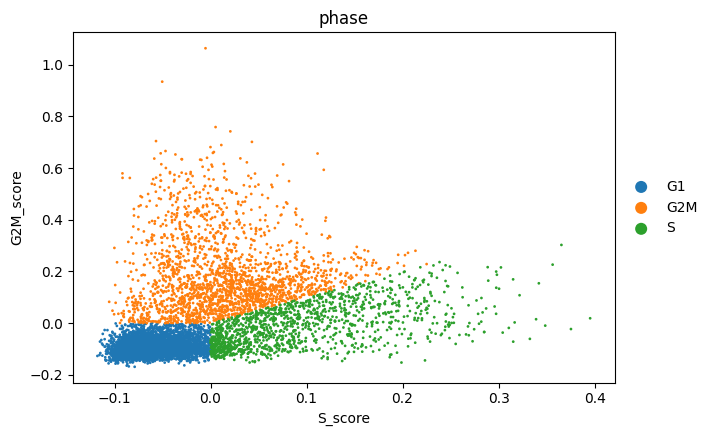

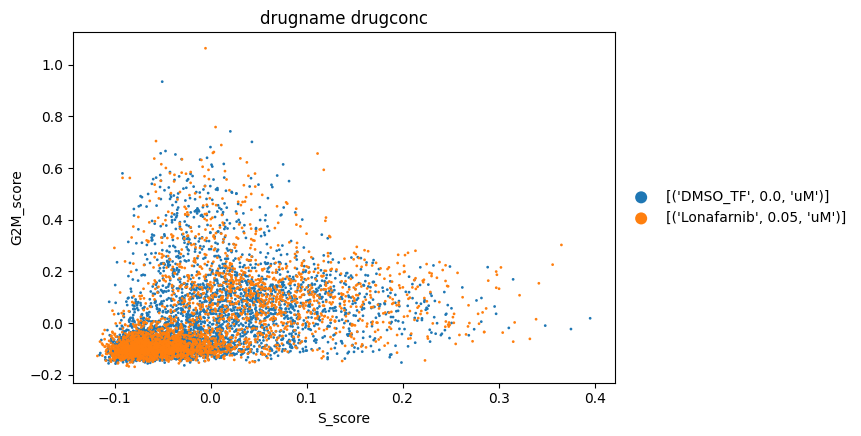

In [76]:
sc.pl.scatter(adatat,x='S_score',y='G2M_score',color='phase')
sc.pl.scatter(adatat,x='S_score',y='G2M_score',color='drugname_drugconc')

In [75]:
adatat

AnnData object with n_obs × n_vars = 7713 × 10000
    obs: 'sample', 'gene_count', 'tscp_count', 'mread_count', 'drugname_drugconc', 'drug', 'cell_line', 'sublibrary', 'BARCODE', 'pcnt_mito', 'S_score', 'G2M_score', 'phase', 'pass_filter', 'cell_name', 'plate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'drugname_drugconc_colors', 'neighbors', 'umap', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'